<h1 style="text-align:center">Data Science and Machine Learning Capstone Project</h1>
<img style="float:right" src="https://prod-edxapp.edx-cdn.org/static/edx.org/images/logo.790c9a5340cb.png">
<p style="text-align:center">IBM: DS0720EN</p>
<p style="text-align:center">Question 2 of 4</p>

1. [Problem Statement](#problem)
2. [Question 2](#question)
3. [Analyzing and Visualizing](#analysis)
4. [Concluding Remarks](#conclusion)

<a id="problem"></a>
## Problem Statement
---

The people of New York use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

<a id="question"></a>
## Question 2
---

Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

### Approach
Analyze the data to see if there is a higher correlation between the HEATING complaints and any particular borough, ZIP code, or street.

### Load Data
Separately the [New York 311](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) data was loaded by [SODA](https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status) into a Pandas DataFrame then saved to a pickle file.

In [2]:
import pandas as pd
df = pd.read_pickle('C:\\Users\\It_Co\\Documents\\DataScience\\Capstone\\ny311full.pkl') # Local
#df = pd.read_pickle('./ny311.pkl') #IBM Cloud / Watson Studio
#df.head()

<a id="analysis"></a>
## Analyzing and Visualizing
---

### Reduce data to relevant rows and columns

In [3]:
#Determine relevant columns
df.head(1)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-28T20:31:44.000,43918968,ELECTRIC,11435.0,141-40 PERSHING CRESCENT,PERSHING CRESCENT,ADDRESS,Jamaica,The following complaint conditions are still o...,QUEENS,40.712047,-73.815983,NaN,RESIDENTIAL BUILDING,Open


In [5]:
df['complaint_type'].value_counts()

HEAT/HOT WATER            1152592
HEATING                    887869
PLUMBING                   703637
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       438981
PAINT - PLASTER            361258
PAINT/PLASTER              341793
ELECTRIC                   303971
NONCONST                   260890
DOOR/WINDOW                200577
WATER LEAK                 188389
GENERAL                    146965
FLOORING/STAIRS            135619
APPLIANCE                  110165
HPD Literature Request      52830
SAFETY                      50250
OUTSIDE BUILDING             7039
ELEVATOR                     6476
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complain

In [3]:
df.complaint_type.isnull().sum()

0

<p style="color:Red;">None of the complaint types are null.</p>

In [4]:
df['complaint_type'].describe()

count            5862383
unique                29
top       HEAT/HOT WATER
freq             1152592
Name: complaint_type, dtype: object

<p style="color:Red;">HEAT/HOT WATER is the most common of the 29 unique complaint types, but closer examination is necessary to make a final answer to the question.</p>

In [5]:
unique_types = df['complaint_type'].unique()
unique_types.sort()
unique_types

array(['AGENCY', 'APPLIANCE', 'Appliance', 'CONSTRUCTION', 'DOOR/WINDOW',
       'ELECTRIC', 'ELEVATOR', 'FLOORING/STAIRS', 'GENERAL',
       'GENERAL CONSTRUCTION', 'General', 'HEAT/HOT WATER', 'HEATING',
       'HPD Literature Request', 'Mold', 'NONCONST', 'OUTSIDE BUILDING',
       'Outside Building', 'PAINT - PLASTER', 'PAINT/PLASTER', 'PLUMBING',
       'Plumbing', 'SAFETY', 'STRUCTURAL', 'Safety',
       'UNSANITARY CONDITION', 'Unsanitary Condition', 'VACANT APARTMENT',
       'WATER LEAK'], dtype=object)

<p style="color:Red;">Some of these appear to be duplicate ways to represent the same thing.  The Open Data Page does not provide any clarification of these values, in case for example, water leaks should be lumped in with plumbing.  In a more real situation we could ask for such clarification.  If that was not available an analysis of whether apparent duplicates come from different Open_Data_Channel_Type could help formulate the best guess why there are apparent duplicates.</p>

In [6]:
#Although we may need dummy values for later questions, for now just normalize the data in-place.
#Using best guess interpretation about which complaint types are equivalent to each other.
df['complaint_type'].replace('Appliance', 'APPLIANCE', inplace = True)
df['complaint_type'].replace('GENERAL CONSTRUCTION', 'CONSTRUCTION', inplace = True)
df['complaint_type'].replace('General', 'GENERAL', inplace = True)
df['complaint_type'].replace('HEATING', 'HEAT/HOT WATER', inplace = True)
df['complaint_type'].replace('Outside Building', 'OUTSIDE BUILDING', inplace = True)
df['complaint_type'].replace('PAINT - PLASTER', 'PAINT/PLASTER', inplace = True)
df['complaint_type'].replace('Plumbing', 'PLUMBING', inplace = True)
df['complaint_type'].replace('Safety', 'SAFETY', inplace = True)
df['complaint_type'].replace('Unsanitary Condition', 'UNSANITARY CONDITION', inplace = True)

In [7]:
print(df['complaint_type'].describe())
unique_types = df['complaint_type'].unique()
unique_types.sort()
unique_types

count            5862383
unique                20
top       HEAT/HOT WATER
freq             2040461
Name: complaint_type, dtype: object


array(['AGENCY', 'APPLIANCE', 'CONSTRUCTION', 'DOOR/WINDOW', 'ELECTRIC',
       'ELEVATOR', 'FLOORING/STAIRS', 'GENERAL', 'HEAT/HOT WATER',
       'HPD Literature Request', 'Mold', 'NONCONST', 'OUTSIDE BUILDING',
       'PAINT/PLASTER', 'PLUMBING', 'SAFETY', 'STRUCTURAL',
       'UNSANITARY CONDITION', 'VACANT APARTMENT', 'WATER LEAK'],
      dtype=object)

<p style="color:Red;">Twenty complaint types after consolidating obvious duplicates.

In [8]:
print (1 - 2040461.00 / 5862383.00) # taking values from the "describe" statement above.

0.6519400046022241


<p style="color:Red;">HEAT/HOT WATER represents almost 2/3 of the complaints.</p>

In [9]:
print(df["complaint_type"].value_counts())    

HEAT/HOT WATER            2040461
PLUMBING                   703648
PAINT/PLASTER              703051
CONSTRUCTION               505941
UNSANITARY CONDITION       444480
ELECTRIC                   303971
NONCONST                   260890
DOOR/WINDOW                200577
WATER LEAK                 188389
GENERAL                    148128
FLOORING/STAIRS            135619
APPLIANCE                  110169
HPD Literature Request      52830
SAFETY                      50674
OUTSIDE BUILDING             7045
ELEVATOR                     6476
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Mold                            1
Name: complaint_type, dtype: int64


<p style="color:Red;">The next two or three most common complaints combined happen less.</p>

<p style="color:Red;">Let's take a more visual look, just to double check.</p>

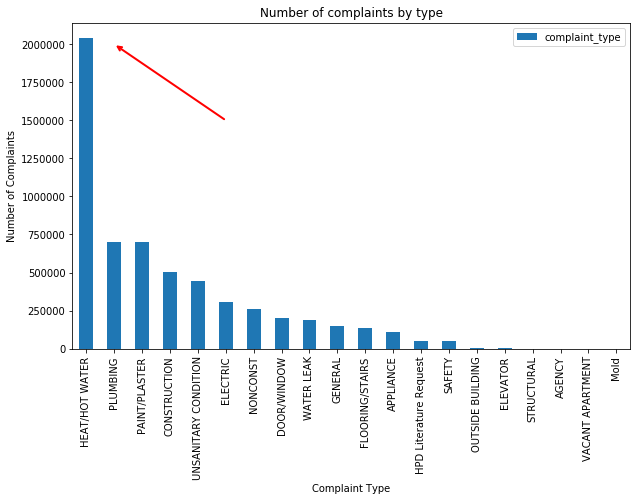

In [10]:
#Plot a bar chart to show how many of each type of complaint.
%matplotlib inline
import matplotlib.pyplot as plt
totals = pd.DataFrame(df['complaint_type'].value_counts())
totals.plot(kind='bar', figsize=(10,6), rot=90)
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")
plt.title("Number of complaints by type")
plt.annotate('', xycoords='data', xy=(1, 2000000), xytext=(5, 1500000), arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='r', lw=2))
plt.show()

<p style="color:Red;">Clearly, nothing else comes close to HEAT/HOT WATER over the entire data set.</p>

<p style="color:Red;">Perhaps the top complaint changes over time and HEAT/HOT WATER is only the top one in aggregate?  Let's see if that has been the case by also looking at totals for each individual year.</p>

In [11]:
#Add Year column.
def strleft(s):
    return s[0:4]
df['Year'] = df['created_date'].apply(strleft)

In [12]:
#Determine unique list of years.
unique_years = df['Year'].unique()
unique_years.sort()

In [13]:
#Calculate yearly totals
import numpy as np
yearly_totals = pd.DataFrame(index=unique_types, columns=unique_years)
for y in unique_years:
    values_this_year = df[df['Year']==y]['complaint_type'].value_counts()
    for i in values_this_year.index:
        yearly_totals.at[i,y] = values_this_year[i]
yearly_totals.replace(np.nan, 0, inplace = True)
yearly_totals = yearly_totals.transpose()

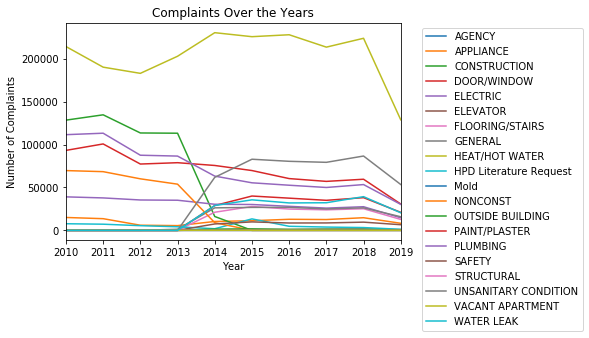

In [14]:
#Plot the number of complaints by type and year.
yearly_totals.plot(kind="line")
plt.title('Complaints Over the Years')
plt.ylabel('Number of Complaints')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

<p style="color:Red;">The top complaint type consistently every year is HEAT/HOT WATER.</p>

<p style="color:Red;">All the totals drop off at the end.  This is because the data set is updated every day, but the final year 2019 is still in progress with almost three months to go.</p>

<a id="conclusion"></a>
## Concluding Remarks
---

The complaint types are always entered with the data records, but more than one value is sometimes used to express the same type, so this needs to be taken into account during analysis.  One type of complaint happens far more than the other types, not only over the course of the whole ten years captured in the data set, but also individually each year.

The Department of Housing Preservation and Development of New York City should first focus on this type of complaint:

<p style="color:Red;">HEAT/HOT WATER (including HEATING)</p>

In every manner examined, this is the most common complaint.